In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder


In [ ]:
file_path="/content/13.csv"
df=pd.read_csv(file_path)


In [ ]:
print(df.shape)

(1977, 37)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 37 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1971 non-null   object
 2   5. Academic Year                                                                                            

In [ ]:
df1=df.copy()

In [ ]:
df1['combined_label'] = df1['Anxiety Label'] + "|" + df1['Depression Label'] + "|" + df1['Stress Label']

In [ ]:
numerical_data = df1.select_dtypes(include='number')
print(numerical_data.columns.tolist())
print(len(numerical_data.columns.tolist()))

['1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ', '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ', '3. In a semester, how often have you had trouble relaxing due to academic pressure? ', '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?', '5. In a semester, how often have you worried too much about academic affairs? ', '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?', '7. In a semester, how often have you felt afraid, as if something awful might happen?', 'Anxiety Value', '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ', '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?', '3. In a semester, how often you felt nervous and stressed because of academic pressure? 

In [ ]:
categorical_data=df1.select_dtypes(include='object')
categorical_features=categorical_data.columns.tolist()
print(categorical_features)
print(len(categorical_data.columns.tolist()))

['1. Age', '2. Gender', '5. Academic Year', '6. Current CGPA', '7. Did you receive a waiver or scholarship at your university?', 'Anxiety Label', 'Stress Label', 'Depression Label', 'combined_label']
9


In [ ]:
print(numerical_data.describe())

       1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?   \
count                                        1977.000000                                             
mean                                            1.770359                                             
std                                             0.951704                                             
min                                             0.000000                                             
25%                                             1.000000                                             
50%                                             2.000000                                             
75%                                             3.000000                                             
max                                             3.000000                                             

       2. In a semester, how often have you been unable to stop worrying about yo

In [ ]:
categorical_data.describe().T

count unique  \
1. Age                                              1977      5   
2. Gender                                           1971      3   
5. Academic Year                                    1977      5   
6. Current CGPA                                     1977      6   
7. Did you receive a waiver or scholarship at y...  1977      2   
Anxiety Label                                       1977      4   
Stress Label                                        1977      3   
Depression Label                                    1977      6   
combined_label                                      1977     53   

                                                                                                  top  \
1. Age                                                                                          18-22   
2. Gender                                                                                        Male   
5. Academic Year                                                             First Year or Equivalent   
6. Current CGPA                                                                           3.00 - 3.39   
7. Did you receive a waiver or scholarship at y...                                                 No   
Anxiety Label                                                                          Severe Anxiety   
Stress Label                                                                          Moderate Stress   
Depression Label                                                         Moderately Severe Depression   
combined_label                                      Severe Anxiety|Severe Depression|High Perceive...   

                                                    freq  
1. Age                                              1273  
2. Gender                                           1369  
5. Academic Year                                     592  
6. Current CGPA                                      572  
7. Did you receive a waiver or scholarship at y...  1571  
Anxiety Label                                        714  
Stress Label                                        1316  
Depression Label                                     495  
combined_label                                       262

In [ ]:
numerical_data.var()

1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?                                                                                0.905740
2. In a semester, how often have you been unable to stop worrying about your academic affairs?                                                                            1.057303
3. In a semester, how often have you had trouble relaxing due to academic pressure?                                                                                       0.992685
4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?                                                                       0.933236
5. In a semester, how often have you worried too much about academic affairs?                                                                                             0.965035
6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?                                                              0.986222
7. In a semester, how often have you felt afraid, as if something awful might happen?                                                                                     1.118804
Anxiety Value                                                                                                                                                            30.210407
1. In a semester, how often have you felt upset due to something that happened in your academic affairs?                                                                  1.389096
2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?                                                          1.332978
3. In a semester, how often you felt nervous and stressed because of academic pressure?                                                                                   1.288591
4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)                                 1.499057
5. In a semester, how often you felt confident about your ability to handle your academic / university problems?                                                          1.177857
6. In a semester, how often you felt as if things in your academic life is going on your way?                                                                             1.209750
7. In a semester, how often are you able to control irritations in your academic / university affairs?                                                                    1.046602
8. In a semester, how often you felt as if your academic performance was on top?                                                                                          1.283785
9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?                                                             1.384303
10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?                                                 1.356968
Stress Value                                                                                                                                                             45.567968
1. In a semester, how often have you had little interest or pleasure in doing things?                                                                                     0.914620
2. In a semester, how often have you been feeling down, depressed or hopeless?                                                                                            1.069218
3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?                                                                         1.124392
4. In a semester, how often have you been feeling tired or hav

In [ ]:
df1.head()

1. Age 2. Gender           5. Academic Year 6. Current CGPA  \
0  18-22    Female  Fourth Year or Equivalent     2.50 - 2.99   
1  18-22      Male   First Year or Equivalent     3.80 - 4.00   
2  18-22      Male   First Year or Equivalent     3.00 - 3.39   
3  18-22      Male   First Year or Equivalent     3.40 - 3.79   
4  18-22      Male   First Year or Equivalent     3.40 - 3.79   

  7. Did you receive a waiver or scholarship at your university?  \
0                                                 No               
1                                                 No               
2                                                 No               
3                                                 No               
4                                                 No               

   1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?   \
0                                                  1                                             
1                                                  2                                             
2                                                  2                                             
3                                                  2                                             
4                                                  1                                             

   2. In a semester, how often have you been unable to stop worrying about your academic affairs?   \
0                                                  1                                                 
1                                                  2                                                 
2                                                  1                                                 
3                                                  1                                                 
4                                                  1                                                 

   3. In a semester, how often have you had trouble relaxing due to academic pressure?   \
0                                                  1                                      
1                                                  1                                      
2                                                  1                                      
3                                                  1                                      
4                                                  1                                      

   4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?  \
0                                                  2                                                     
1                                                  1                                                     
2                                                  0                                                     
3                                                  1                                                     
4                                                  1                                                     

   5. In a semester, how often have you worried too much about academic affairs?   \
0                                                  2                                
1                                                  1                                
2                                                  2                                
3                                                  1                                
4                                                  1                                

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?   \
0                                                  1                                                    
1                                 

In [ ]:
print(df1.head().T)

                                                                                                    0  \
1. Age                                                                                          18-22   
2. Gender                                                                                      Female   
5. Academic Year                                                            Fourth Year or Equivalent   
6. Current CGPA                                                                           2.50 - 2.99   
7. Did you receive a waiver or scholarship at y...                                                 No   
1. In a semester, how often you felt nervous, a...                                                  1   
2. In a semester, how often have you been unabl...                                                  1   
3. In a semester, how often have you had troubl...                                                  1   
4. In a semester, how often have you been easil...     

In [ ]:
numerical_data.skew()

1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?                                                                              -0.212193
2. In a semester, how often have you been unable to stop worrying about your academic affairs?                                                                          -0.039330
3. In a semester, how often have you had trouble relaxing due to academic pressure?                                                                                     -0.159674
4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?                                                                     -0.163491
5. In a semester, how often have you worried too much about academic affairs?                                                                                           -0.299283
6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?                                                            -0.213637
7. In a semester, how often have you felt afraid, as if something awful might happen?                                                                                   -0.154958
Anxiety Value                                                                                                                                                           -0.205279
1. In a semester, how often have you felt upset due to something that happened in your academic affairs?                                                                -0.239091
2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?                                                        -0.172693
3. In a semester, how often you felt nervous and stressed because of academic pressure?                                                                                 -0.451584
4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)                               -0.244127
5. In a semester, how often you felt confident about your ability to handle your academic / university problems?                                                         0.106442
6. In a semester, how often you felt as if things in your academic life is going on your way?                                                                           -0.062219
7. In a semester, how often are you able to control irritations in your academic / university affairs?                                                                   0.048234
8. In a semester, how often you felt as if your academic performance was on top?                                                                                        -0.114352
9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?                                                           -0.219522
10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?                                               -0.212607
Stress Value                                                                                                                                                             0.309841
1. In a semester, how often have you had little interest or pleasure in doing things?                                                                                    0.200843
2. In a semester, how often have you been feeling down, depressed or hopeless?                                                                                          -0.215588
3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?                                                                       -0.102687
4. In a semester, how often have you been feeling tired or having little energy?    

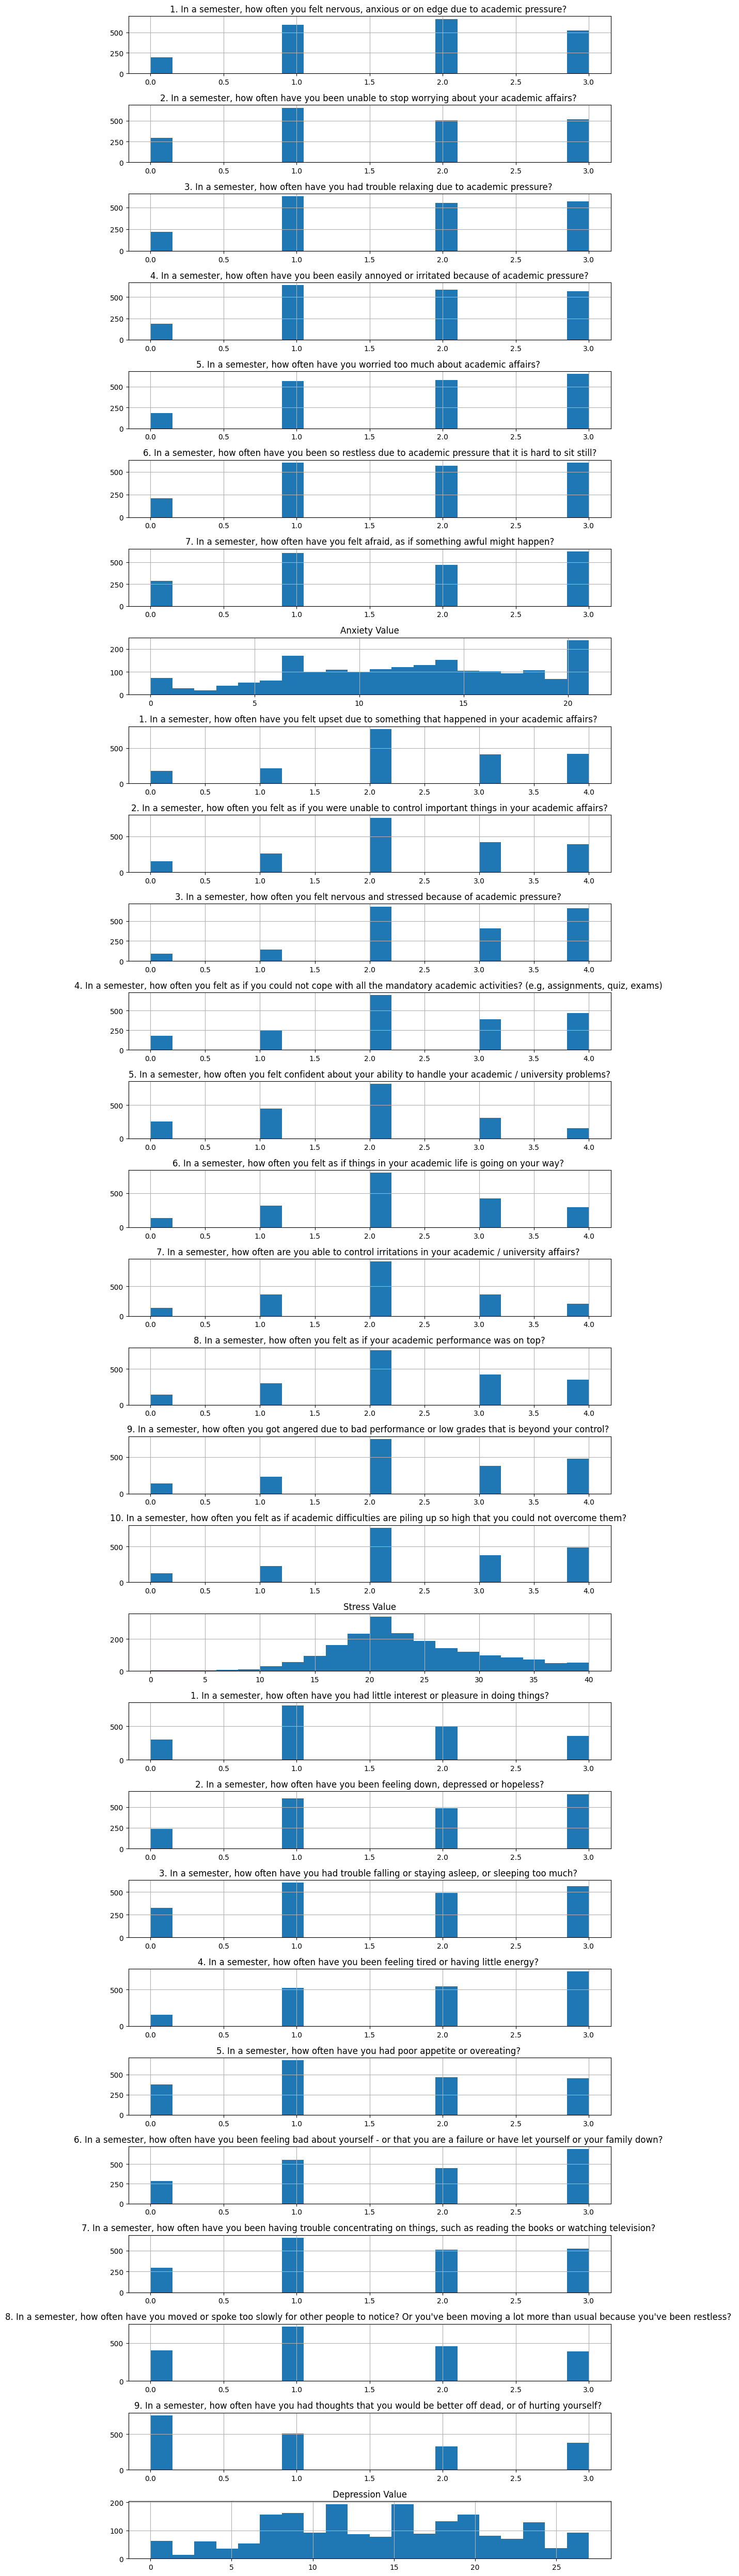

In [ ]:
numerical_data.hist(figsize=(10,50),bins=20, layout=(len(numerical_data.columns), 1))
plt.tight_layout()
plt.show()

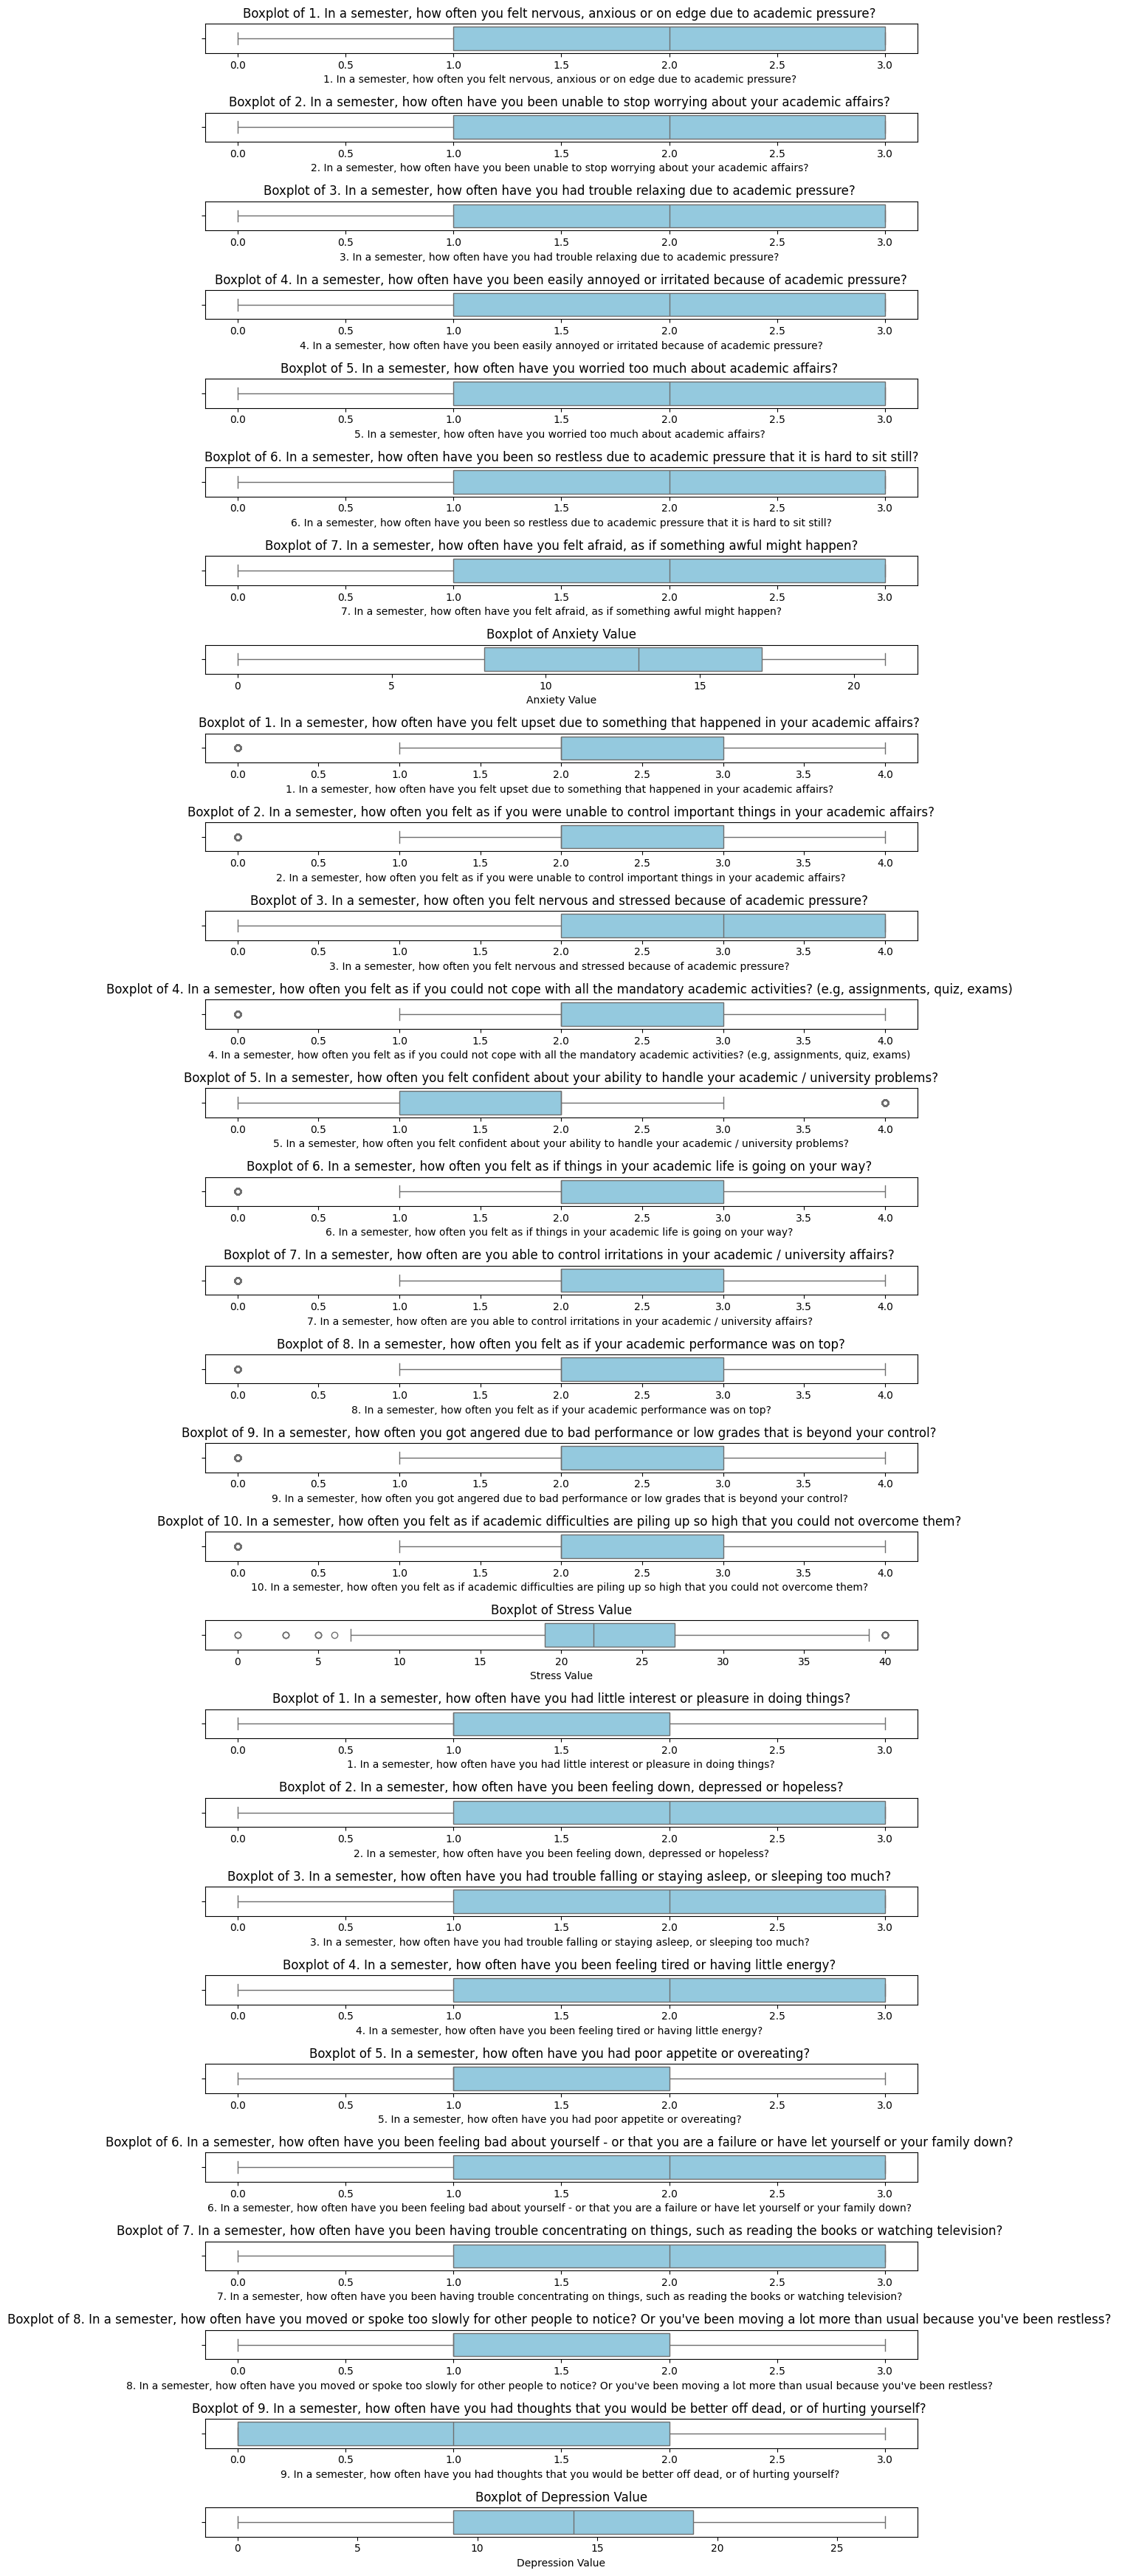

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(10, 35))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
numerical_data.nunique()


1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?                                                                                4
2. In a semester, how often have you been unable to stop worrying about your academic affairs?                                                                            4
3. In a semester, how often have you had trouble relaxing due to academic pressure?                                                                                       4
4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?                                                                       4
5. In a semester, how often have you worried too much about academic affairs?                                                                                             4
6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?                                                              4
7. In a semester, how often have you felt afraid, as if something awful might happen?                                                                                     4
Anxiety Value                                                                                                                                                            22
1. In a semester, how often have you felt upset due to something that happened in your academic affairs?                                                                  5
2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?                                                          5
3. In a semester, how often you felt nervous and stressed because of academic pressure?                                                                                   5
4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)                                 5
5. In a semester, how often you felt confident about your ability to handle your academic / university problems?                                                          5
6. In a semester, how often you felt as if things in your academic life is going on your way?                                                                             5
7. In a semester, how often are you able to control irritations in your academic / university affairs?                                                                    5
8. In a semester, how often you felt as if your academic performance was on top?                                                                                          5
9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?                                                             5
10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?                                                 5
Stress Value                                                                                                                                                             38
1. In a semester, how often have you had little interest or pleasure in doing things?                                                                                     4
2. In a semester, how often have you been feeling down, depressed or hopeless?                                                                                            4
3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?                                                                         4
4. In a semester, how often have you been feeling tired or having little energy?                                                                                          4
5. In a semester, how often have you had poo

In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()

print(unique_counts)


1. Age                                                             5
2. Gender                                                          3
5. Academic Year                                                   5
6. Current CGPA                                                    6
7. Did you receive a waiver or scholarship at your university?     2
Anxiety Label                                                      4
Stress Label                                                       3
Depression Label                                                   6
combined_label                                                    53
dtype: int64


In [ ]:
print(df1.isnull().sum())

1. Age                                                                                                                                                                   0
2. Gender                                                                                                                                                                6
5. Academic Year                                                                                                                                                         0
6. Current CGPA                                                                                                                                                          0
7. Did you receive a waiver or scholarship at your university?                                                                                                           0
1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?                                                       

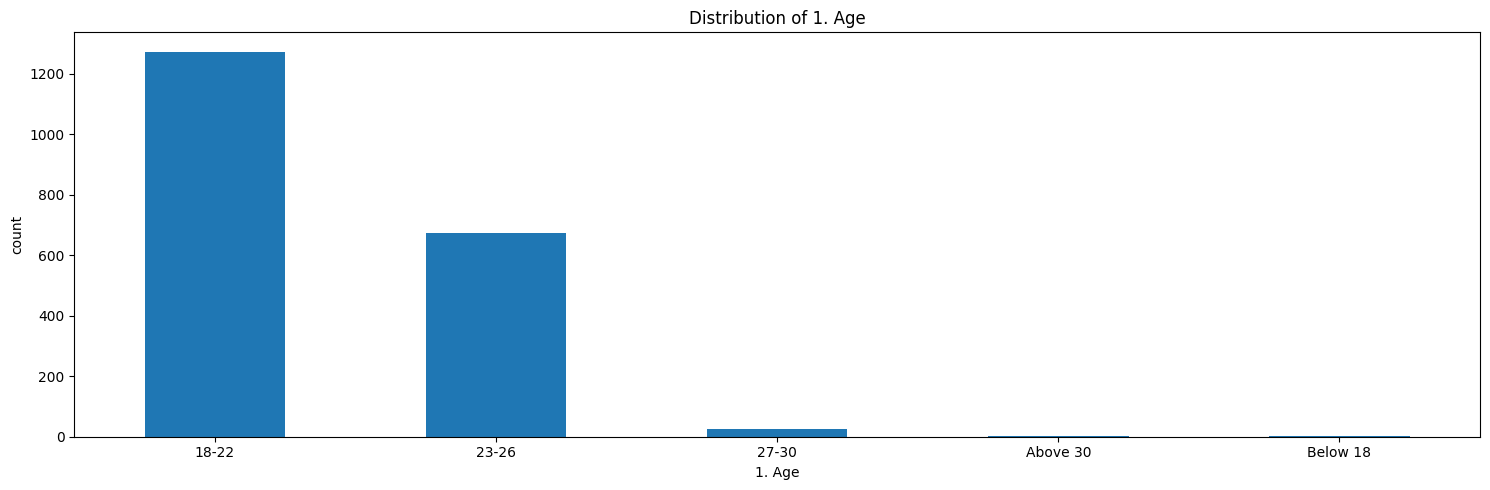

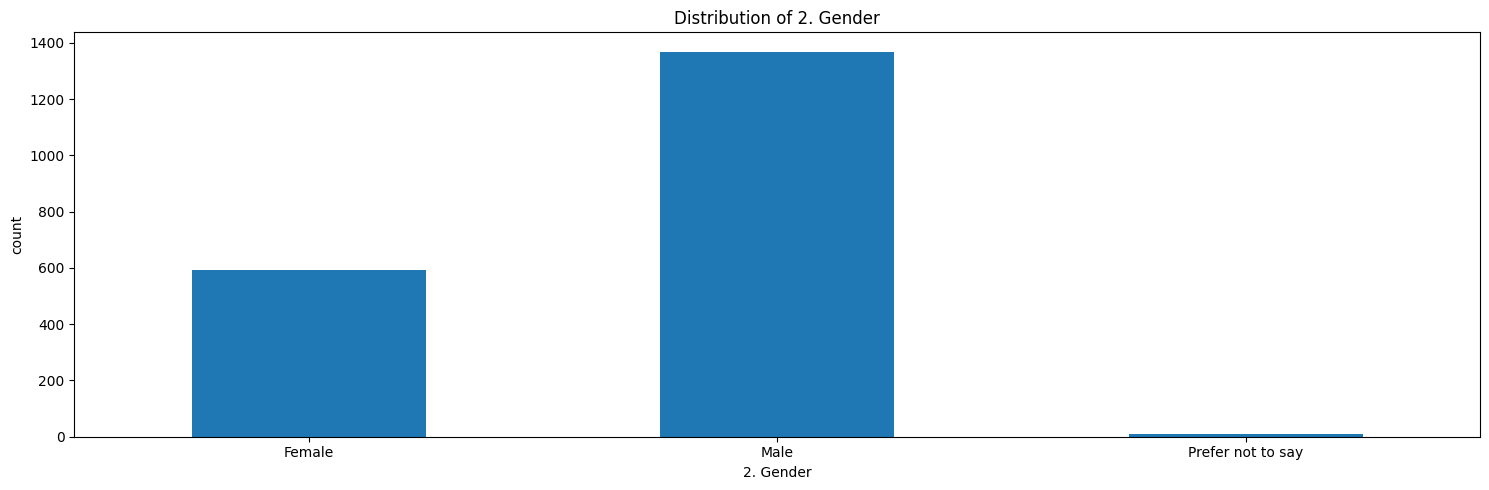

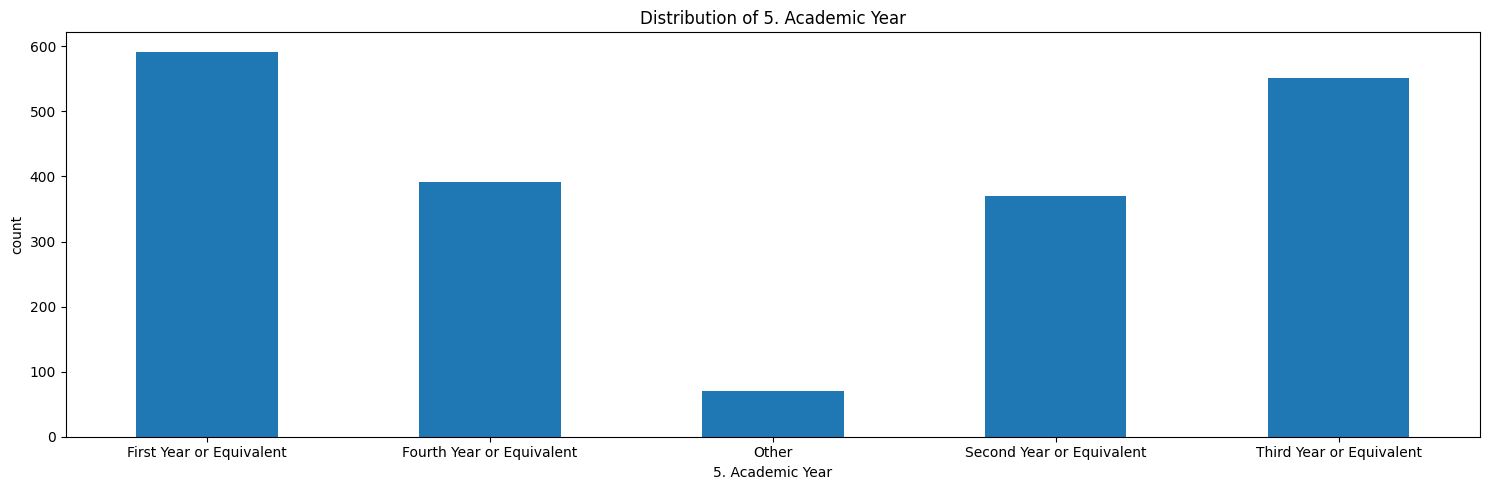

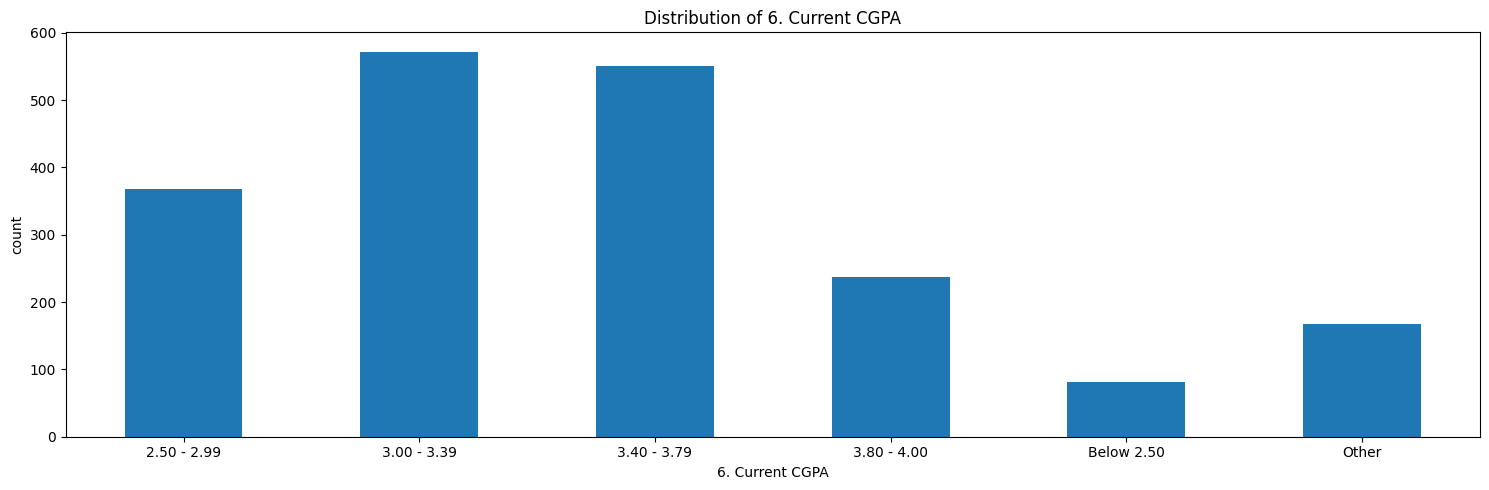

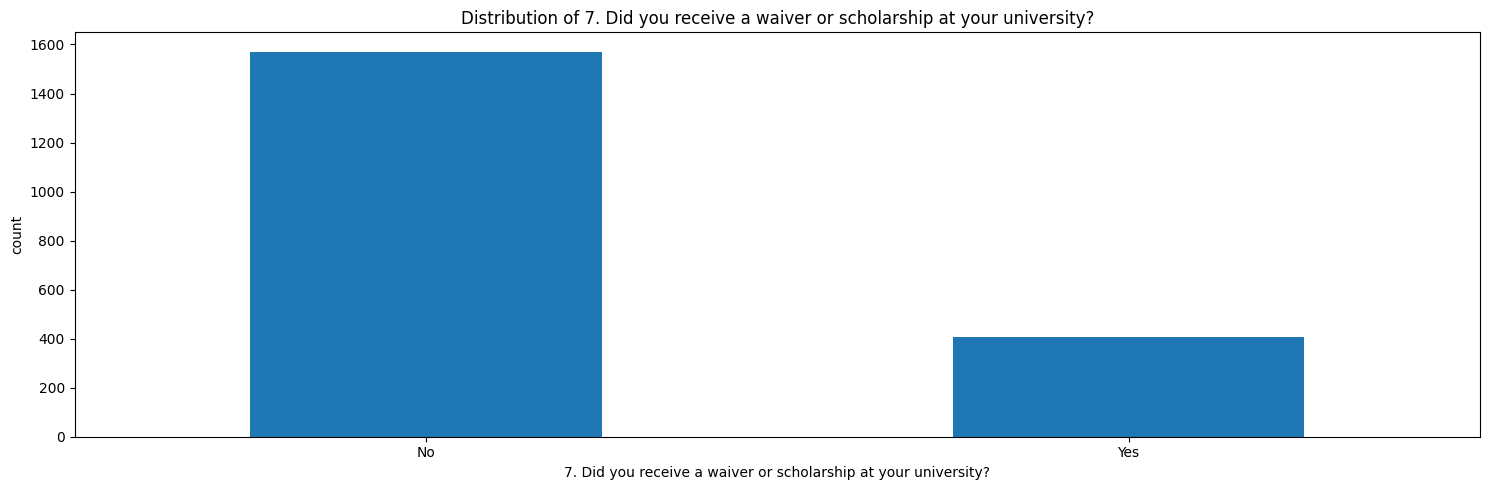

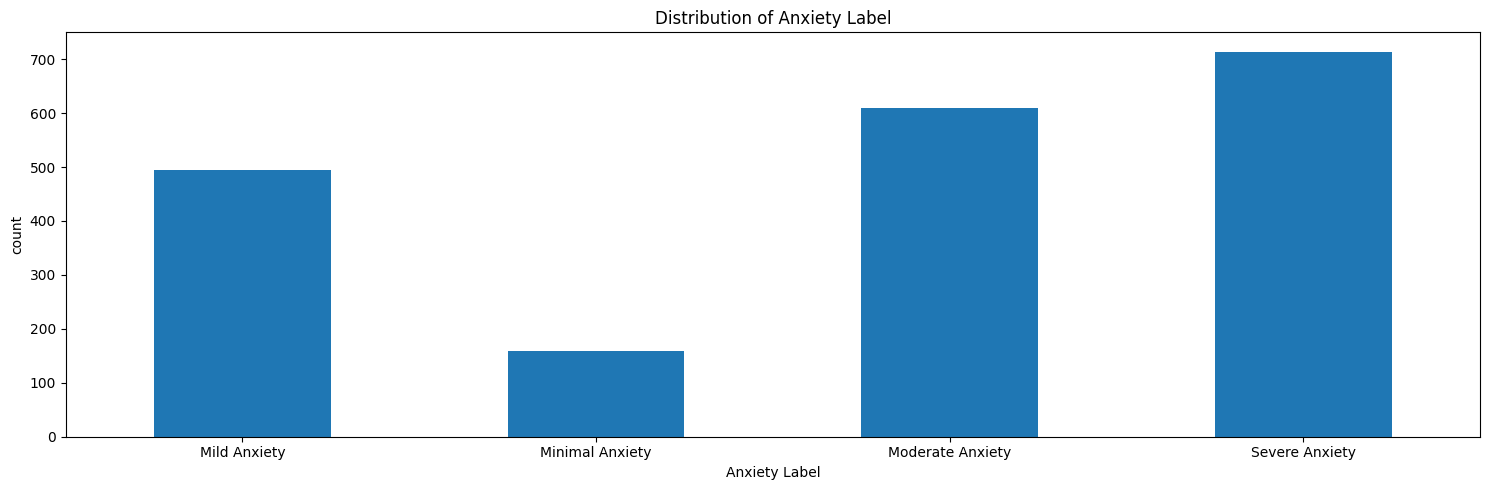

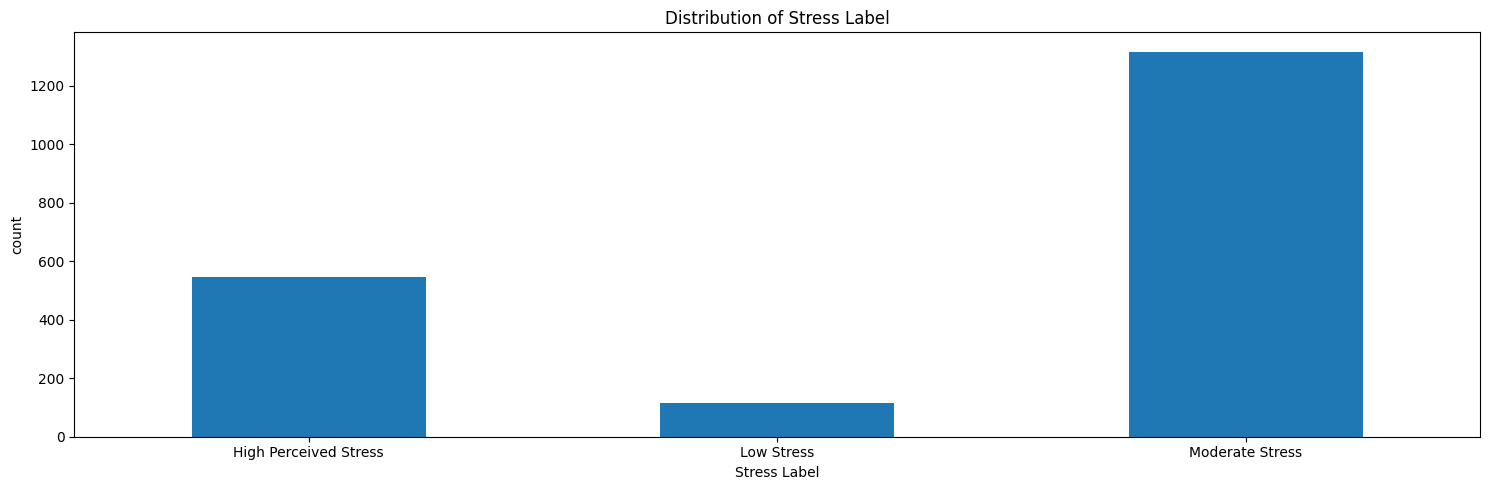

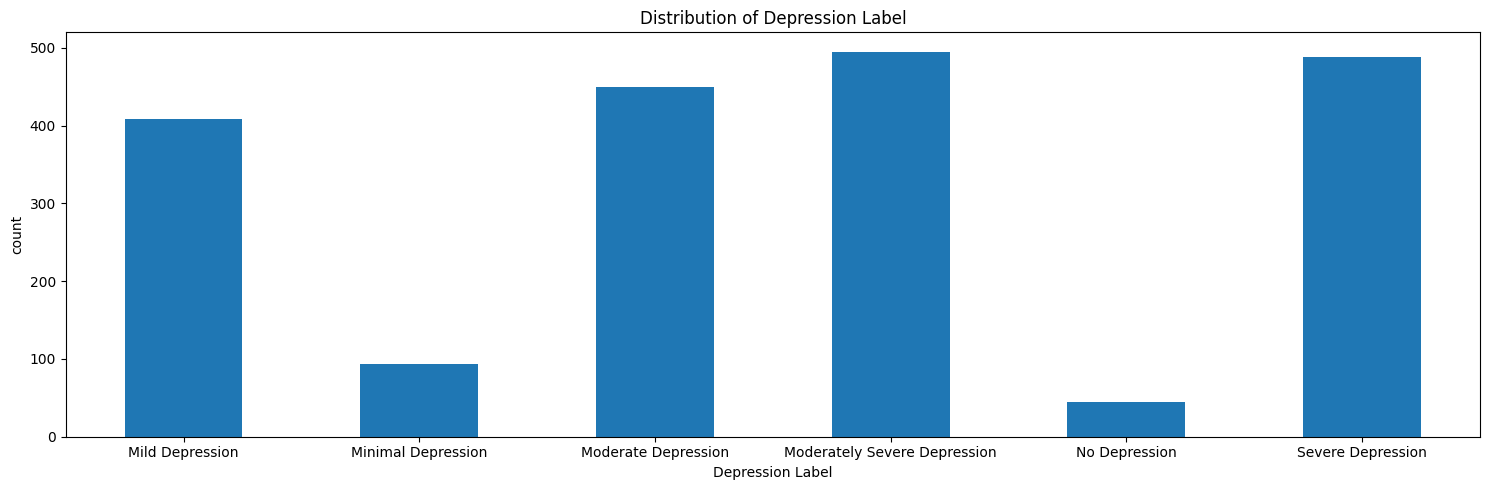

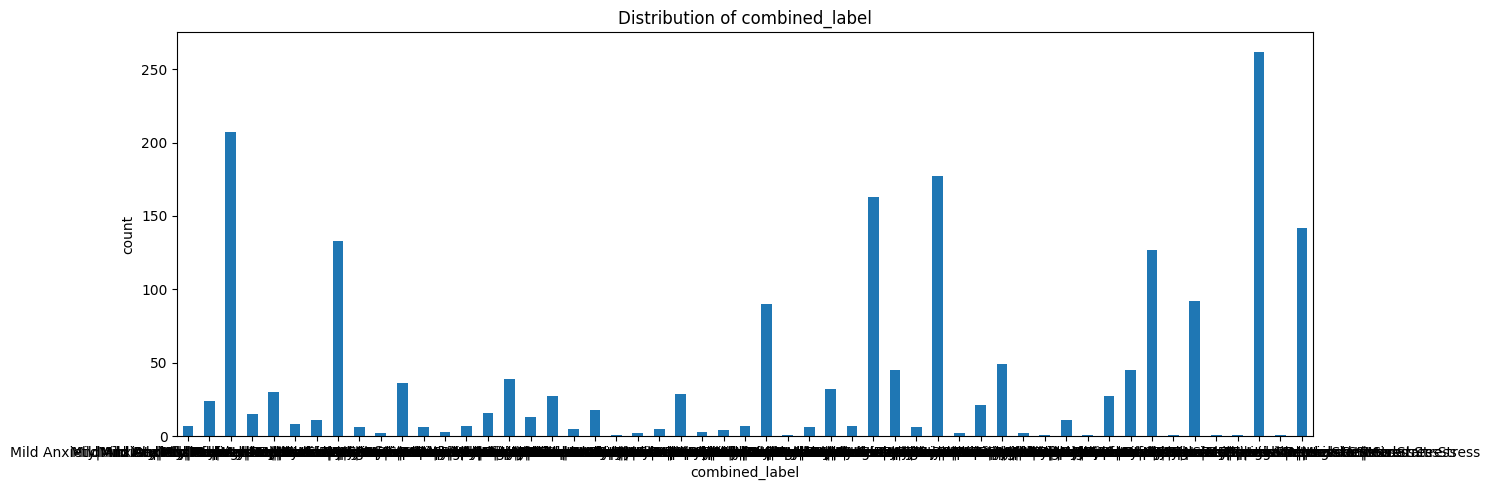

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(figsize=(15,5), kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.tight_layout()
    plt.show()

In [ ]:
correlation_matrix = numerical_data.corr()
correlation_matrix

1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?   \
1. In a semester, how often you felt nervous, a...                                           1.000000                                             
2. In a semester, how often have you been unabl...                                           0.495772                                             
3. In a semester, how often have you had troubl...                                           0.511390                                             
4. In a semester, how often have you been easil...                                           0.635193                                             
5. In a semester, how often have you worried to...                                           0.643153                                             
6. In a semester, how often have you been so re...                                           0.580194                                             
7. In a semester, how often have you felt afrai...                                           0.598137                                             
Anxiety Value                                                                                0.805124                                             
1. In a semester, how often have you felt upset...                                           0.491888                                             
2. In a semester, how often you felt as if you ...                                           0.511299                                             
3. In a semester, how often you felt nervous an...                                           0.554435                                             
4. In a semester, how often you felt as if you ...                                           0.518987                                             
5. In a semester, how often you felt confident ...                                           0.052203                                             
6. In a semester, how often you felt as if thin...                                           0.159316                                             
7. In a semester, how often are you able to con...                                           0.069728                                             
8. In a semester, how often you felt as if your...                                           0.158232                                             
9. In a semester, how often you got angered due...                                           0.462067                                             
10. In a semester, how often you felt as if aca...                                           0.537544                                             
Stress Value                                                                                 0.605473                                             
1. In a semester, how often have you had little...                                           0.178723                                             
2. In a semester, how often have you been feeli...                                           0.592705                                             
3. In a semester, how often have you had troubl...                                           0.440335                                             
4. In a semester, how often have you been feeli...                                           0.500472                                             
5. In a semester, how often have you had poor a...                                           0.415241                                             
6. In a semester, how often have you been feeli...                                           0.555560                                             
7. In a semester, how often have you been havin...                                           0.483629                                             
8. In a semester, how often have you moved or s...                                 

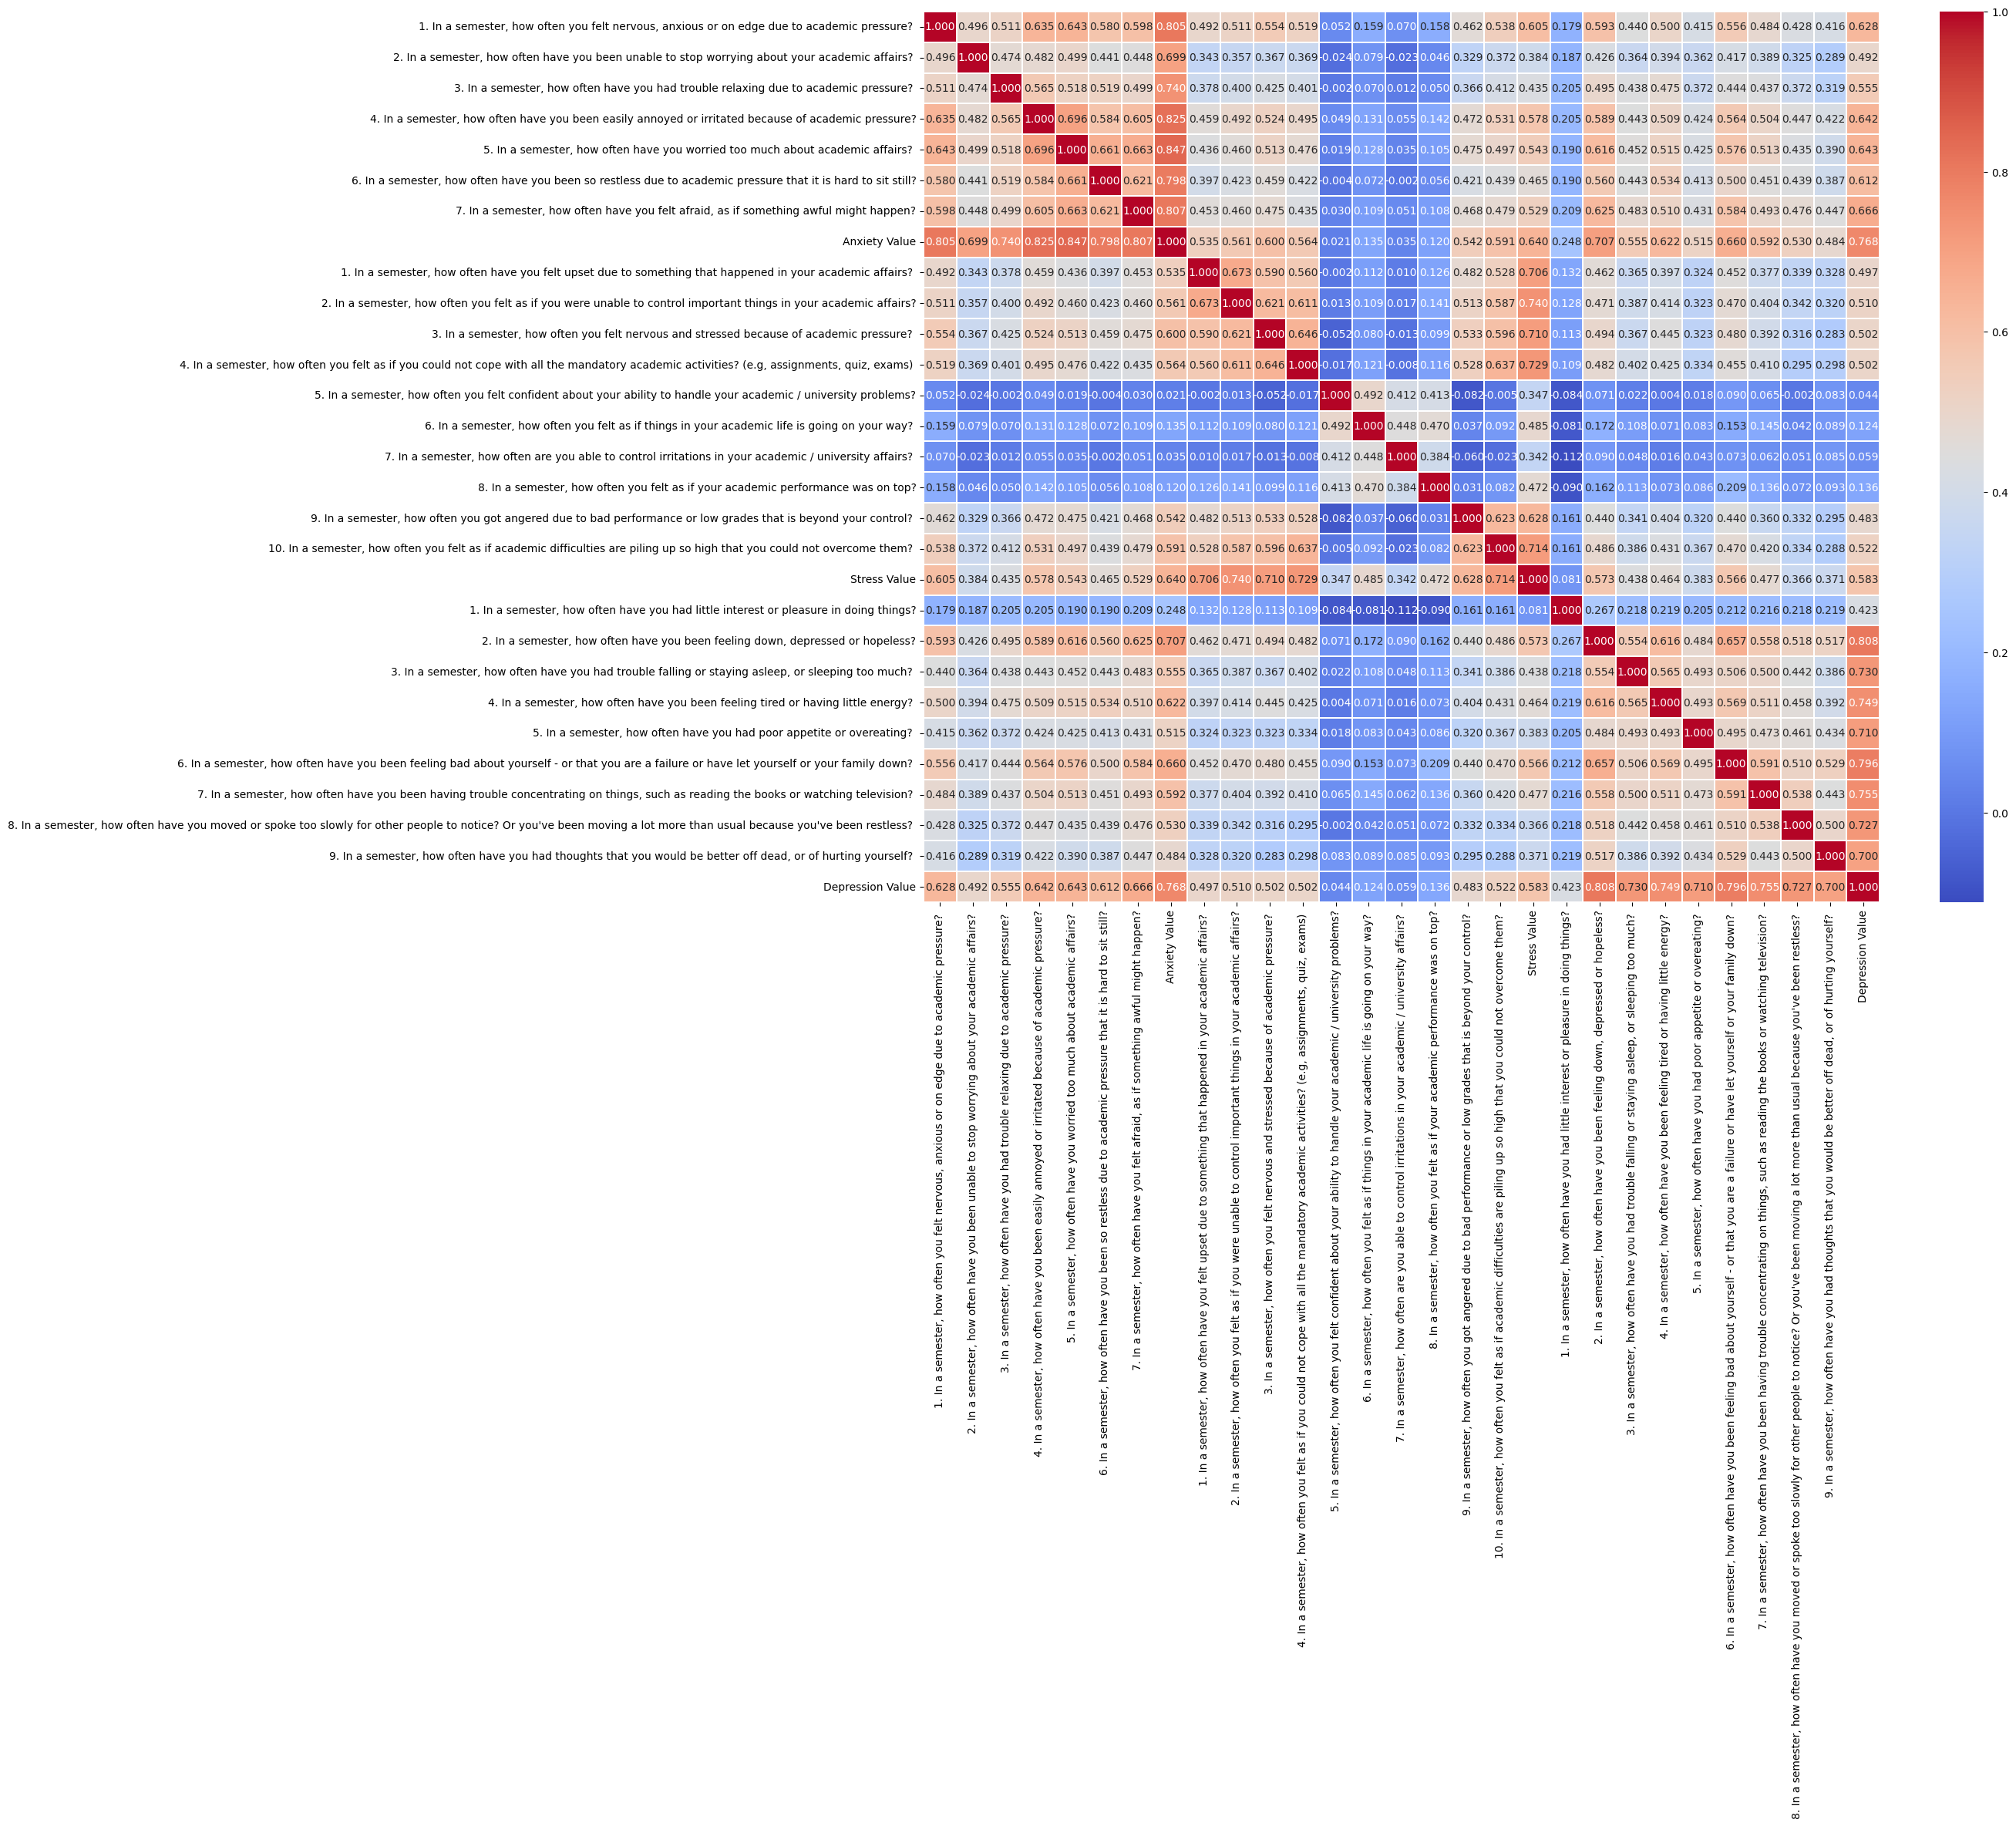

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap( correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

In [ ]:
print(df1.shape)

(1977, 38)


In [ ]:
df.isnull().sum()

1. Age                                                                                                                                                                   0
2. Gender                                                                                                                                                                6
5. Academic Year                                                                                                                                                         0
6. Current CGPA                                                                                                                                                          0
7. Did you receive a waiver or scholarship at your university?                                                                                                           0
1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?                                                                               0
2. In a semester, how often have you been unable to stop worrying about your academic affairs?                                                                           0
3. In a semester, how often have you had trouble relaxing due to academic pressure?                                                                                      0
4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?                                                                      0
5. In a semester, how often have you worried too much about academic affairs?                                                                                            0
6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?                                                             0
7. In a semester, how often have you felt afraid, as if something awful might happen?                                                                                    0
Anxiety Value                                                                                                                                                            0
Anxiety Label                                                                                                                                                            0
1. In a semester, how often have you felt upset due to something that happened in your academic affairs?                                                                 0
2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?                                                         0
3. In a semester, how often you felt nervous and stressed because of academic pressure?                                                                                  0
4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)                                0
5. In a semester, how often you felt confident about your ability to handle your academic / university problems?                                                         0
6. In a semester, how often you felt as if things in your academic life is going on your way?                                                                            0
7. In a semester, how often are you able to control irritations in your academic / university affairs?                                                                   0
8. In a semester, how often you felt as if your academic performance was on top?                                                                                         0
9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?                                                            0
10. In a semester, how often you felt as if academic difficulties a

In [ ]:
df1.dropna(inplace=True)
print(df1.shape)

(1971, 38)


In [ ]:
df1.isnull().sum()

1. Age                                                                                                                                                                   0
2. Gender                                                                                                                                                                0
5. Academic Year                                                                                                                                                         0
6. Current CGPA                                                                                                                                                          0
7. Did you receive a waiver or scholarship at your university?                                                                                                           0
1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?                                                                               0
2. In a semester, how often have you been unable to stop worrying about your academic affairs?                                                                           0
3. In a semester, how often have you had trouble relaxing due to academic pressure?                                                                                      0
4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?                                                                      0
5. In a semester, how often have you worried too much about academic affairs?                                                                                            0
6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?                                                             0
7. In a semester, how often have you felt afraid, as if something awful might happen?                                                                                    0
Anxiety Value                                                                                                                                                            0
Anxiety Label                                                                                                                                                            0
1. In a semester, how often have you felt upset due to something that happened in your academic affairs?                                                                 0
2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?                                                         0
3. In a semester, how often you felt nervous and stressed because of academic pressure?                                                                                  0
4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)                                0
5. In a semester, how often you felt confident about your ability to handle your academic / university problems?                                                         0
6. In a semester, how often you felt as if things in your academic life is going on your way?                                                                            0
7. In a semester, how often are you able to control irritations in your academic / university affairs?                                                                   0
8. In a semester, how often you felt as if your academic performance was on top?                                                                                         0
9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?                                                            0
10. In a semester, how often you felt as if academic difficulties a

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

categorical_data=df1.select_dtypes(include='object').columns.tolist()

for i in categorical_data:
  print(f'feature:{i}; Unique values: {df1[i].unique()}')
  df1[i] = enc.fit_transform(df1[i])

feature:1. Age; Unique values: ['18-22' '23-26' 'Below 18' '27-30' 'Above 30']
feature:2. Gender; Unique values: ['Female' 'Male' 'Prefer not to say']
feature:5. Academic Year; Unique values: ['Fourth Year or Equivalent' 'First Year or Equivalent'
 'Third Year or Equivalent' 'Second Year or Equivalent' 'Other']
feature:6. Current CGPA; Unique values: ['2.50 - 2.99' '3.80 - 4.00' '3.00 - 3.39' '3.40 - 3.79' 'Below 2.50'
 'Other']
feature:7. Did you receive a waiver or scholarship at your university?; Unique values: ['No' 'Yes']
feature:Anxiety Label; Unique values: ['Moderate Anxiety' 'Mild Anxiety' 'Minimal Anxiety' 'Severe Anxiety']
feature:Stress Label; Unique values: ['Moderate Stress' 'Low Stress' 'High Perceived Stress']
feature:Depression Label; Unique values: ['Moderate Depression' 'Mild Depression' 'Moderately Severe Depression'
 'Minimal Depression' 'Severe Depression' 'No Depression']
feature:combined_label; Unique values: ['Moderate Anxiety|Moderate Depression|Moderate Stres

In [ ]:
print(df1.head().T)

                                                     0   1   2   3   4
1. Age                                               0   0   0   0   0
2. Gender                                            0   1   1   1   1
5. Academic Year                                     1   0   0   0   0
6. Current CGPA                                      0   3   1   2   2
7. Did you receive a waiver or scholarship at y...   0   0   0   0   0
1. In a semester, how often you felt nervous, a...   1   2   2   2   1
2. In a semester, how often have you been unabl...   1   2   1   1   1
3. In a semester, how often have you had troubl...   1   1   1   1   1
4. In a semester, how often have you been easil...   2   1   0   1   1
5. In a semester, how often have you worried to...   2   1   2   1   1
6. In a semester, how often have you been so re...   2   1   2   1   1
7. In a semester, how often have you felt afrai...   1   1   2   1   1
Anxiety Value                                       10   9  10   8   7
Anxiet

In [ ]:
corr_matrix = df1.corr()
target_corr = corr_matrix['combined_label']
print(target_corr)

print(df.shape)
print(df1.shape)

1. Age                                                                                                                                                                  -0.034022
2. Gender                                                                                                                                                               -0.082696
5. Academic Year                                                                                                                                                         0.129514
6. Current CGPA                                                                                                                                                         -0.010091
7. Did you receive a waiver or scholarship at your university?                                                                                                           0.039198
1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?                    

In [ ]:
df1 = df1.drop(['1. Age','Anxiety Label', '2. Gender', '6. Current CGPA',
              '7. Did you receive a waiver or scholarship at your university?',
              '5. Academic Year',
              '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?',
              '6. In a semester, how often you felt as if things in your academic life is going on your way? ',
              '7. In a semester, how often are you able to control irritations in your academic / university affairs? ',
              '8. In a semester, how often you felt as if your academic performance was on top?'], axis=1)


In [ ]:
print(df1.shape)

(1971, 28)


In [ ]:
max_val_combined_label=max(df1['combined_label'].unique())

In [ ]:
#check Imbalance in data

#group instances based on the classes in OUTCOME variable
class_counts=df1.groupby("combined_label").size()

columns=['outcome','count','percentage']
outcome=[]
for i in range(0,max_val_combined_label+1):
  outcome.append(i)

count=list()
percentage=list()

#Calculate the percentage of each value of the OUTCOME variable from total
for val in range(53):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df = pd.DataFrame(list(zip(outcome, count, percentage)), columns=columns)
imbalance_df = imbalance_df.sort_values(by='count', ascending=False)

imbalance_df

outcome  count  percentage
50       50    262    0.249524
2         2    206    0.196190
35       35    175    0.166667
32       32    163    0.155238
52       52    141    0.134286
7         7    132    0.125714
45       45    127    0.120952
47       47     92    0.087619
27       27     90    0.085714
38       38     49    0.046667
44       44     45    0.042857
33       33     45    0.042857
15       15     38    0.036190
10       10     36    0.034286
30       30     32    0.030476
4         4     30    0.028571
23       23     29    0.027619
17       17     27    0.025714
43       43     27    0.025714
1         1     24    0.022857
37       37     21    0.020000
19       19     18    0.017143
14       14     16    0.015238
3         3     15    0.014286
16       16     13    0.012381
41       41     11    0.010476
6         6     11    0.010476
5         5      8    0.007619
0         0      7    0.006667
31       31      7    0.006667
26       26      7    0.006667
13       13      7    0.006667
34       34      6    0.005714
8         8      6    0.005714
11       11      6    0.005714
29       29      6    0.005714
18       18      5    0.004762
22       22      5    0.004762
25       25      4    0.003810
12       12      3    0.002857
24       24      3    0.002857
39       39      2    0.001905
9         9      2    0.001905
21       21      2    0.001905
36       36      2    0.001905
20       20      1    0.000952
28       28      1    0.000952
42       42      1    0.000952
40       40      1    0.000952
48       48      1    0.000952
46       46      1    0.000952
49       49      1    0.000952
51       51      1    0.000952

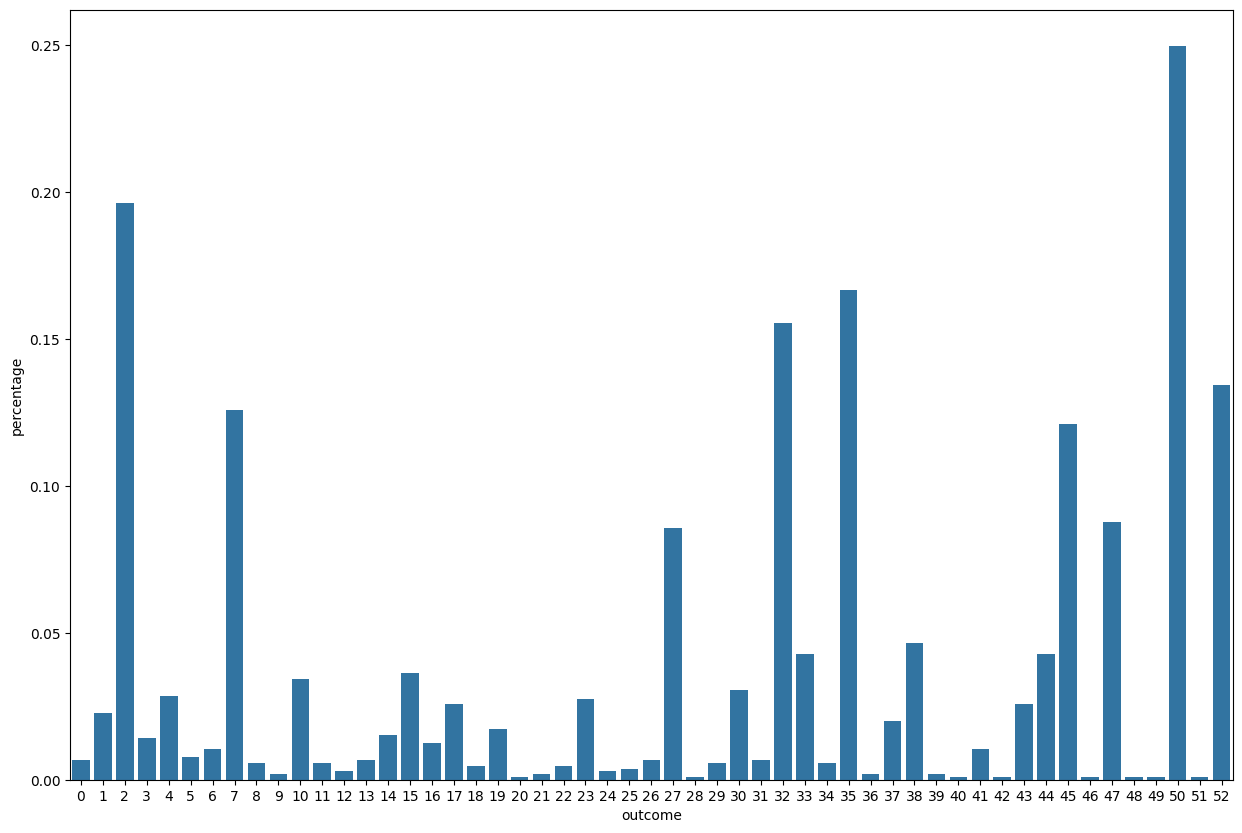

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=imbalance_df,x=imbalance_df['outcome'],y=imbalance_df['percentage'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
df2=df1.copy()
target = df2.iloc[:, -1]  #
df1 = df2.drop(df1.columns[-1], axis=1)
X = df1
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1576, 27)
(395, 27)
(1576,)
(395,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data based on the training set statistics
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)


(1576, 27)


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=30)

# Fit the model
dt.fit(X_train, y_train)

# Evaluate the model
print("Test set accuracy: {:.2f}".format(dt.score(X_test, y_test)))



Test set accuracy: 0.99


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=150, multi_class='multinomial')

# Fit the model to the training data
lr.fit(X_train_scaled, y_train)

# Predict on the test set and print the accuracy score
print("Test set accuracy: {:.2f}".format(lr.score(X_test_scaled, y_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test set accuracy: 0.86


In [ ]:
#Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(53, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0747 - loss: 3.8620 - val_accuracy: 0.3291 - val_loss: 3.1485
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3103 - loss: 2.9627 - val_accuracy: 0.3892 - val_loss: 2.3661
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3975 - loss: 2.2962 - val_accuracy: 0.4525 - val_loss: 1.9988
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4945 - loss: 1.9791 - val_accuracy: 0.5823 - val_loss: 1.7310
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 1.6857 - val_accuracy: 0.6297 - val_loss: 1.4995
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6442 - loss: 1.3902 - val_accuracy: 0.6804 - val_loss: 1.3141
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6922 - loss: 1.2532 - val_accuracy: 0.7057 - val_loss: 1.1500
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7402 - loss: 1.0696 - val_accuracy: 0.7373 - val_loss: 0.9987
Ep

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


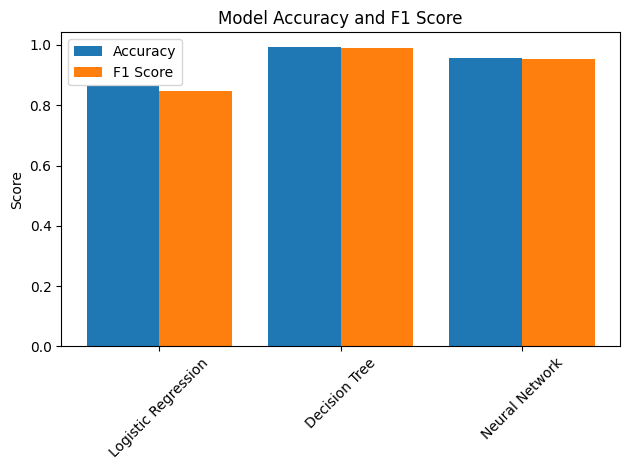

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,f1_score

y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)
y_pred_nn = model.predict(X_test_scaled).argmax(axis=1)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_nn = accuracy_score(y_test, y_pred_nn)

f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')


models = ['Logistic Regression', 'Decision Tree', 'Neural Network']
accuracies = [acc_lr, acc_dt, acc_nn]
f1_scores = [f1_lr, f1_dt, f1_nn]

# Bar chart
x = range(len(models))

plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', align='center')
plt.xticks([i + 0.2 for i in x], models, rotation=45)
plt.ylabel("Score")
plt.title("Model Accuracy and F1 Score")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print(f1_scores)
print(accuracies)

[0.8485659326976173, 0.990223953261928, 0.952983204172641]
[0.8632911392405064, 0.9924050632911392, 0.9569620253164557]


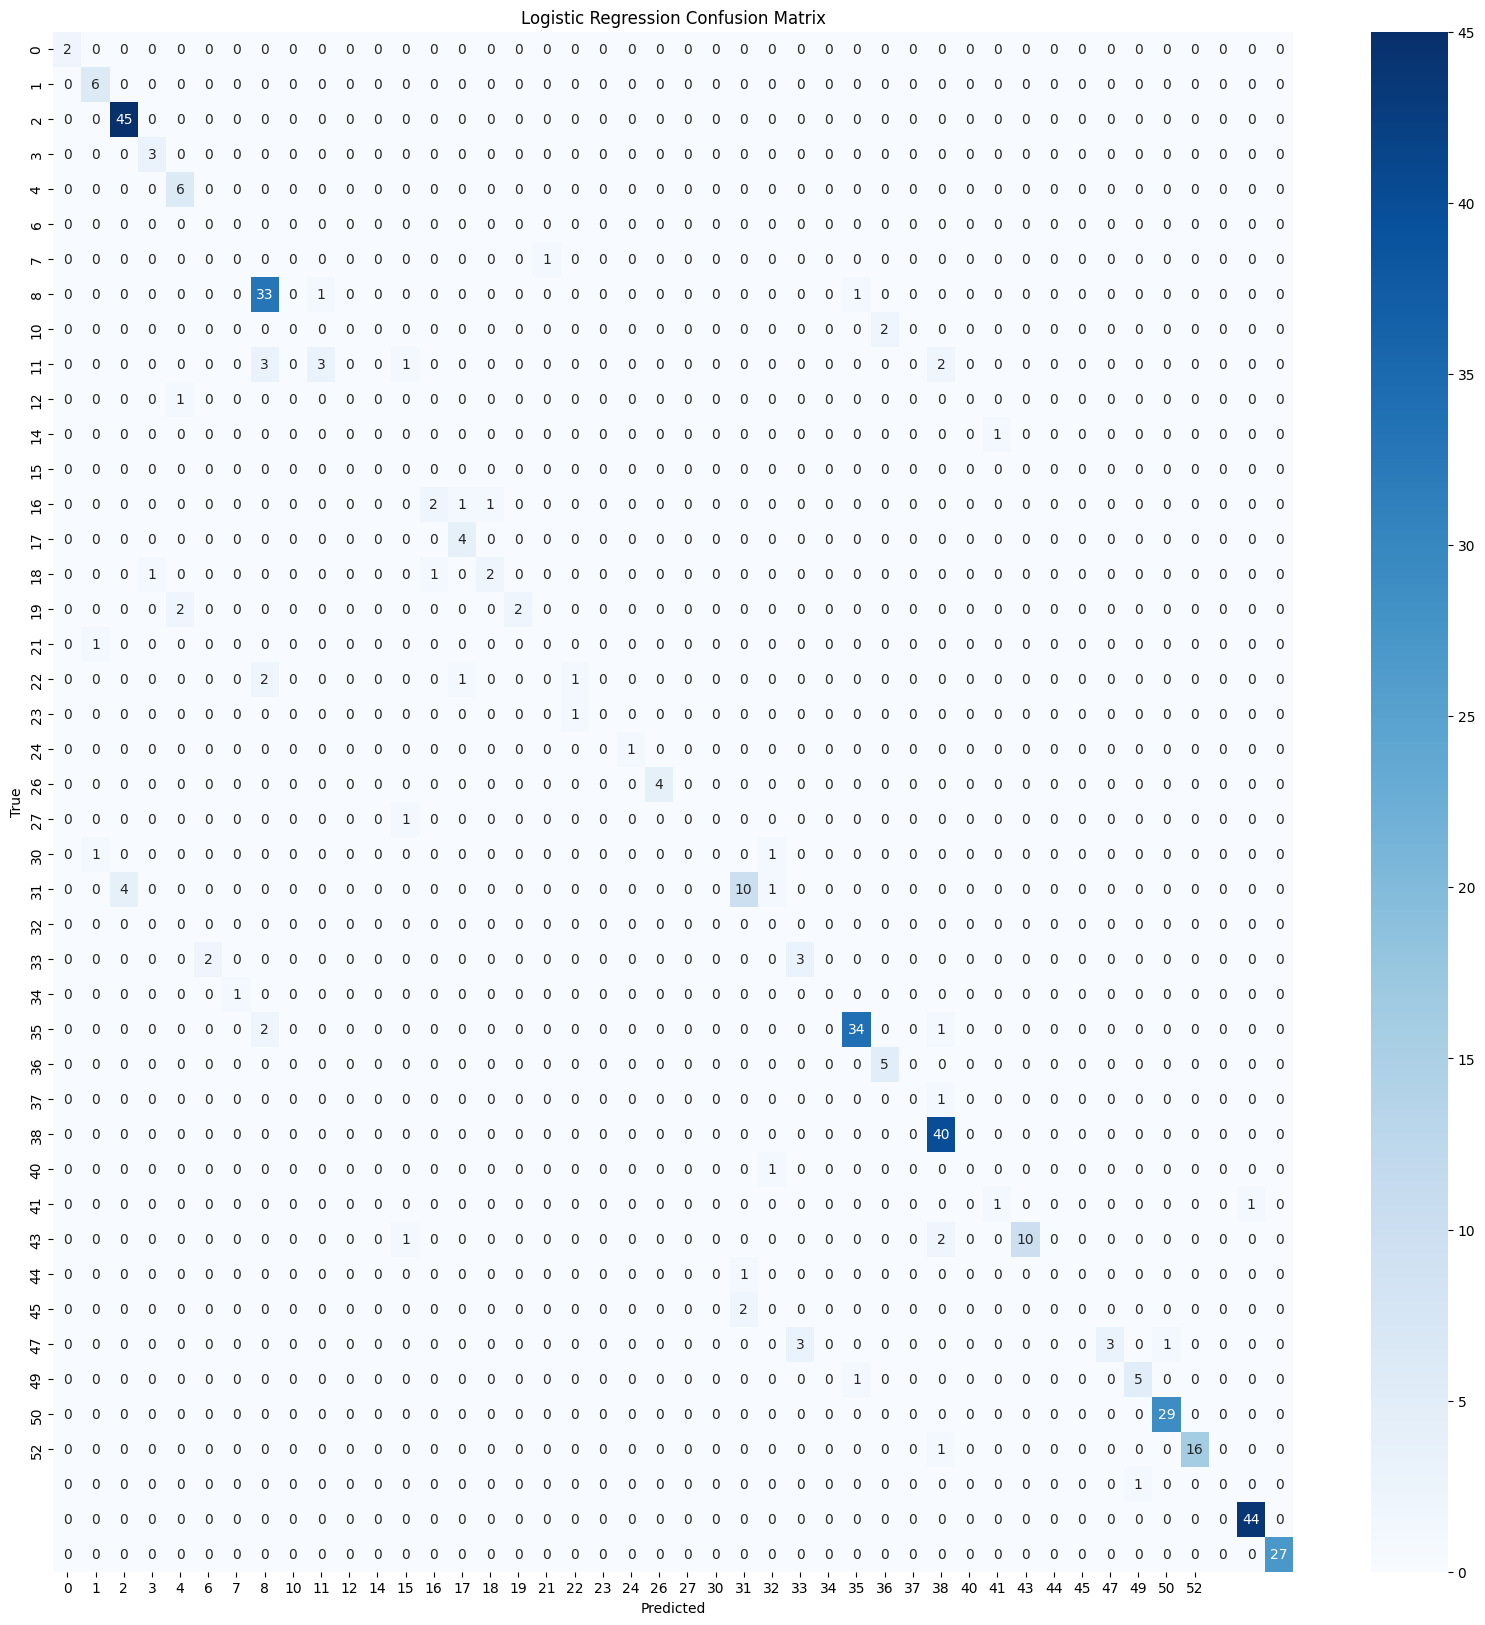

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(20, 20))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

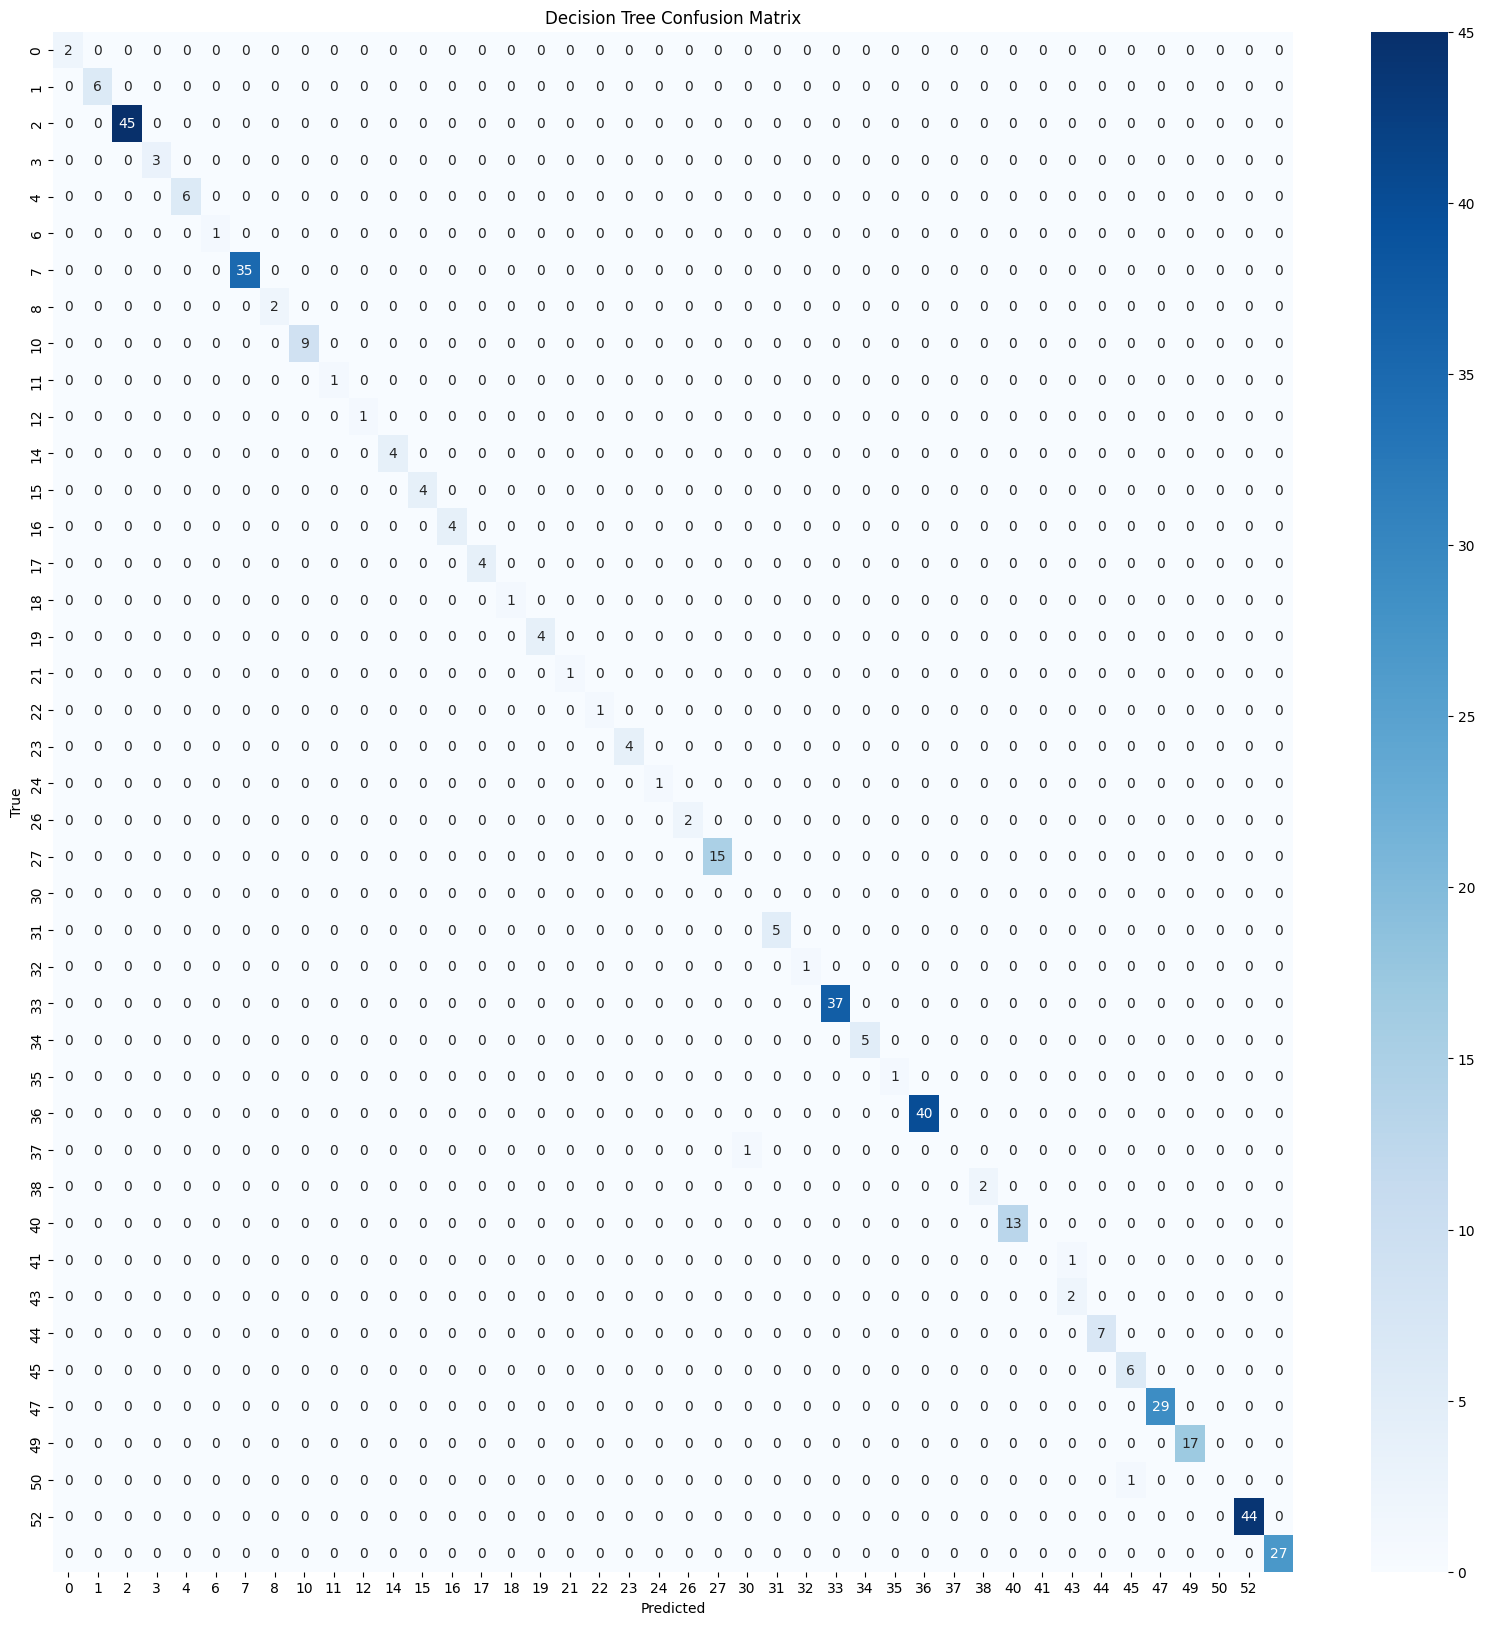

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(20, 20))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         6
           2       0.92      1.00      0.96        45
           3       0.75      1.00      0.86         3
           4       0.67      1.00      0.80         6
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.82      0.94      0.88        35
           8       0.00      0.00      0.00         2
          10       0.75      0.33      0.46         9
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.67      0.50      0.57         4
          15       0.67      1.00      0.80         4
          16       0.67      0.50      0.57         4
          17       1.00      0.50    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

<ipython-input-368-91202ebd4a7d>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


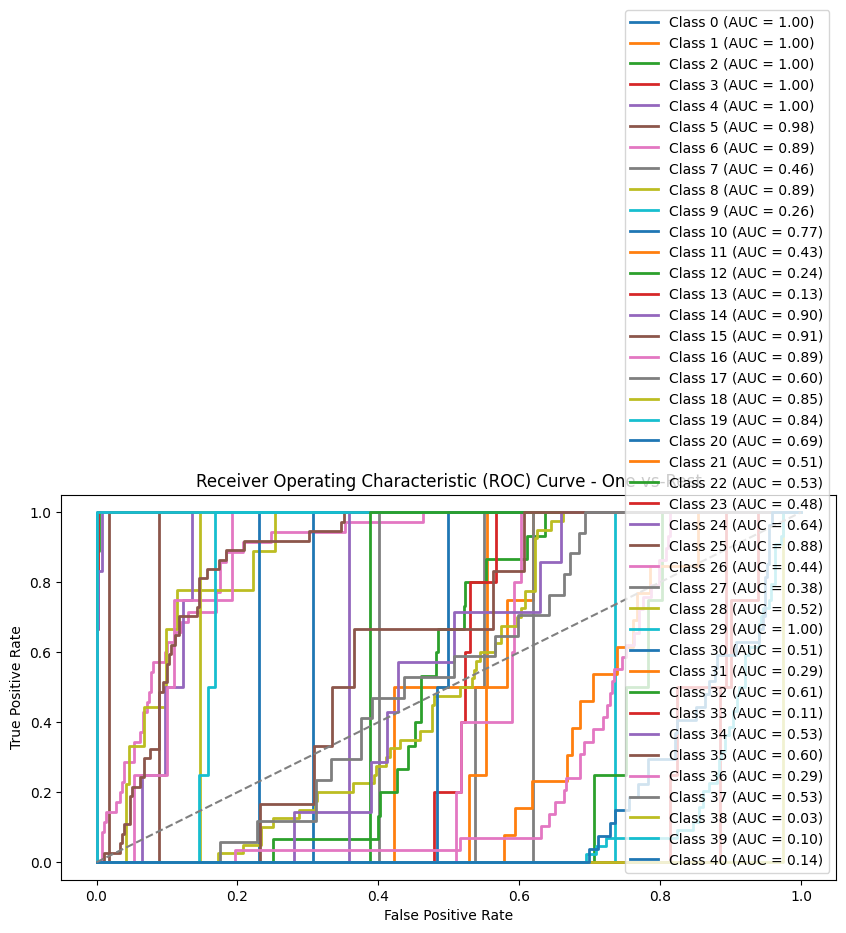

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert y_test (Pandas Series) to NumPy array and reshape
y_test_np = np.array(y_test).reshape(-1, 1)

# Assuming y_test is integer-encoded, let's one-hot encode it
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse=False
y_test_bin = encoder.fit_transform(y_test_np)

# Get predicted probabilities from the logistic regression model
y_pred_lr_prob = lr.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 5))

# Get the number of classes
n_classes = y_test_bin.shape[1]

# Loop over each class to calculate the ROC and AUC
for i in range(n_classes):
    # Calculate ROC curve and AUC for each class (One-vs-Rest)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_lr_prob[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-369-d78f9f0699e9>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


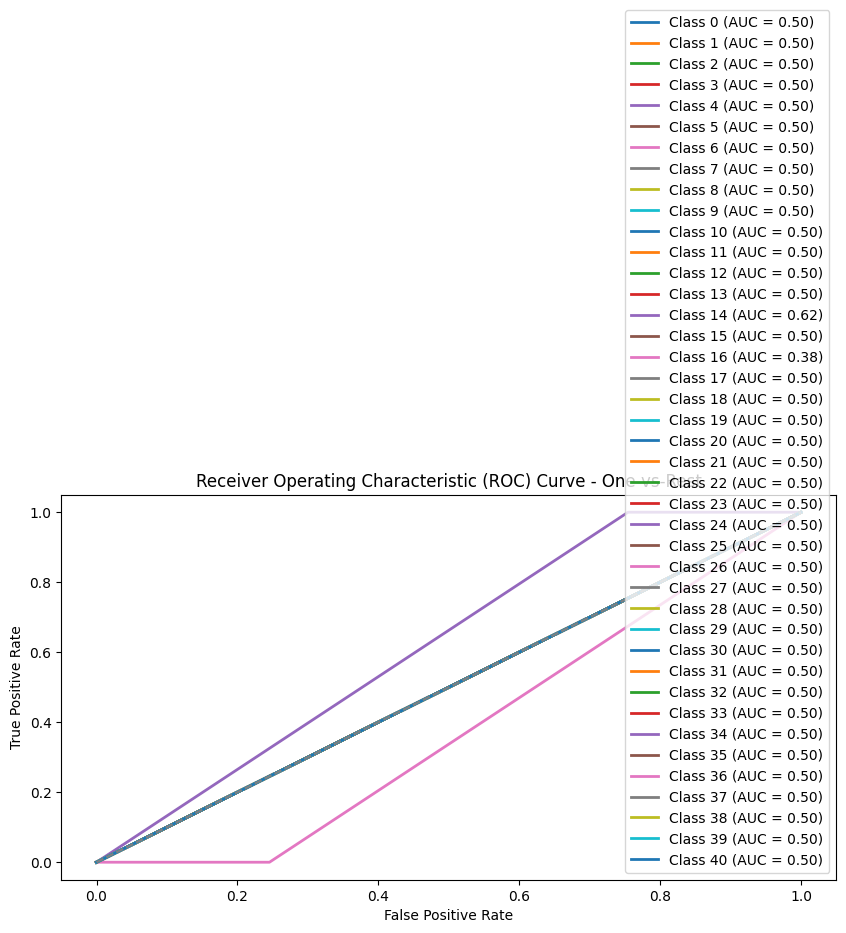

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert y_test (Pandas Series) to NumPy array and reshape
y_test_np = np.array(y_test).reshape(-1, 1)

# Assuming y_test is integer-encoded, let's one-hot encode it
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse=False
y_test_bin = encoder.fit_transform(y_test_np)

# Get predicted probabilities from the logistic regression model
y_pred_lr_prob = dt.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 5))

# Get the number of classes
n_classes = y_test_bin.shape[1]

# Loop over each class to calculate the ROC and AUC
for i in range(n_classes):
    # Calculate ROC curve and AUC for each class (One-vs-Rest)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_lr_prob[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<ipython-input-370-7ccb5809f42d>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


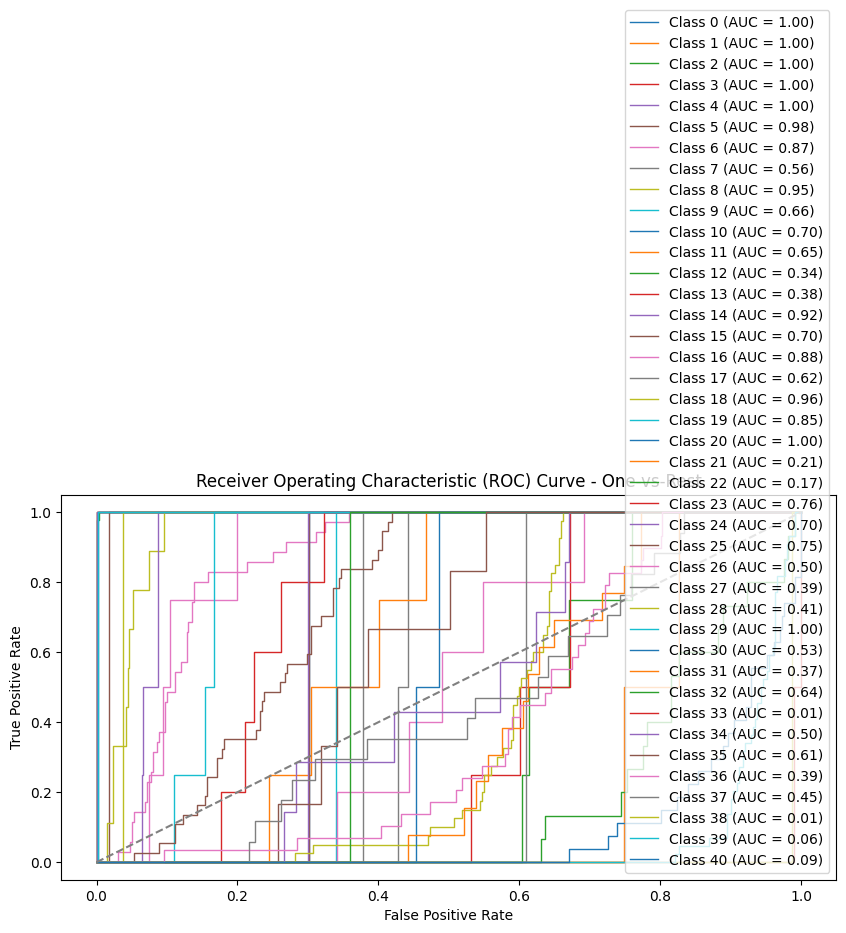

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert y_test (Pandas Series) to NumPy array and reshape
y_test_np = np.array(y_test).reshape(-1, 1)

# Assuming y_test is integer-encoded, let's one-hot encode it
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse=False
y_test_bin = encoder.fit_transform(y_test_np)

# Get predicted probabilities from the neural network model (softmax probabilities)
y_pred_nn_prob = model.predict(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 5))

# Get the number of classes
n_classes = y_test_bin.shape[1]

# Loop over each class to calculate the ROC and AUC
for i in range(n_classes):
    # Calculate ROC curve and AUC for each class (One-vs-Rest)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_nn_prob[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, lw=1, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()
